<h1 align="center">Mathematical Methods In Engineering - 25872</h1>
<h4 align="center">Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Fall 2023</h4>
<h4 align="center">Python Assignment 3</h4>
<h5 align="center">Feel free to contact TA team for any possible questions about the assignment </font>
 </h5>
<h5 align="center">Questions 1,2: @mh_momeni  -  Question 2,3: @Mahdi_h721 </font> </h5>
<h4 align="center"><font color="cyan">Student Name: Shervin Mehrtash</h4>
<h4 align="center"><font color="cyan">Student ID: 400102052</h4>


You should write your code in the <font color='green'>Code Cell</font> and then run the <font color='green'>Evaluation Cell</font> to check the correctness of your code.<br>
<font color='red'>**Please do not edit the codes in the Evaluation Cells.**</font>

##  Q1. Implementing QR Factorization <sub><sup>``(40 pt.)``</sup></sub>

>In this question, we are going to use QR factorization in computing eigenvalues. It is an important building block in numerical linear algebra. Recall that for any matrix $A$
, $A=QR$
 where $Q$
 is orthogonal and $R$
 is upper-triangular.

 **Reminder**: The QR algorithm, uses the QR decomposition, but don't confuse the two.

In [1]:
import numpy as np
np.set_printoptions(suppress=True, precision=4)

In [2]:
n = 5
A = np.random.rand(n,n)
npQ, npR = np.linalg.qr(A)

Check that Q is orthogonal:


In [3]:
np.allclose(np.eye(n), npQ @ npQ.T), np.allclose(np.eye(n), npQ.T @ npQ)

(True, True)

Check that R is triangular

In [5]:
npR

array([[-1.6169, -0.9849, -0.6597, -1.0382, -1.4378],
       [ 0.    ,  0.9643,  0.2864,  0.229 , -0.1457],
       [ 0.    ,  0.    , -0.8458, -0.5313, -0.0512],
       [ 0.    ,  0.    ,  0.    , -0.3871, -0.064 ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.4442]])

### Gram-Schmidt

#### Classical Gram-Schmidt (unstable)

For each $j$
, calculate a single projection

$$v_j=P_ja_j$$

where $P_j$
 projects onto the space orthogonal to the span of $q_1,…,q_{j−1}$
.

In [6]:
def cgs(A):
    m, n = A.shape
    Q = np.zeros([m,n], dtype=np.float64)
    R = np.zeros([n,n], dtype=np.float64)
    for j in range(n):
        V = A[:, j]
        for i in range(j):
            R[i, j] = Q[:, i].T @ A[:, j]
            V = V - R[i, j] * Q[:, i]
        
        Q[:, j] = V / np.linalg.norm(V)
        R[j, j] = Q[:, j].T @ A[:, j]
    return Q, R

In [7]:
Q, R = cgs(A)
np.allclose(A, Q @ R)

True

Check if Q is unitary:

In [8]:
np.allclose(np.eye(len(Q)), Q.dot(Q.T))

True

### Modified Gram-Schmidt (optional)

Classical (unstable) Gram-Schmidt: for each $j$
, calculate a single projection
$$v_j=P_ja_j$$
where $P_j$
 projects onto the space orthogonal to the span of $q_1,…,q_{j−1}$
.

Modified Gram-Schmidt: for each $j$
, calculate $j−1$
 projections
$$P_j=P_{⊥q_{j−1}⋯⊥q_2⊥q_1}$$

In [17]:
n = 3
A = np.random.rand(n,n).astype(np.float64)

In [19]:
def mgs(A):
    m, n = A.shape
    Q = np.zeros([m,n], dtype=np.float64)
    R = np.zeros([n,n], dtype=np.float64)
    V = A.astype(float)
    for j in range(n):
        R[j,j] = np.linalg.norm(V[:,j])
        Q[:,j] = V[:,j] / R[j,j]
        for i in range(j+1, n):
            R[j,i] = Q[:,j].T @ V[:,i]
            V[:,i] = V[:,i] - R[j,i] * Q[:,j]
    return Q, R

In [20]:
Q, R = mgs(A)
np.allclose(np.eye(len(Q)), Q.dot(Q.T.conj()))

True

In [21]:
np.allclose(A, np.matmul(Q,R))

True

### Classical vs Modified Gram-Schmidt

In this part, we want to construct a square matrix $A$ with random singular vectors and widely varying singular values spaced by factors of 2 between $2^{−1}$
 and $2^{−(n+1)}$

In [22]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

In [23]:
n = 100
U, X = np.linalg.qr(np.random.randn(n,n))   # set U to a random orthogonal matrix
V, X = np.linalg.qr(np.random.randn(n,n))   # set V to a random orthogonal matrix
S = np.diag(np.power(2,np.arange(-1,-(n+1),-1), dtype=float))  # Set S to a diagonal matrix w/ exp
                                                              # values between 2^-1 and 2^-(n+1)

In [24]:
A = np.matmul(U,np.matmul(S,V))
QC, RC = cgs(A)
QM, RM = mgs(A) # if you don't complete the mgs function, comment this line

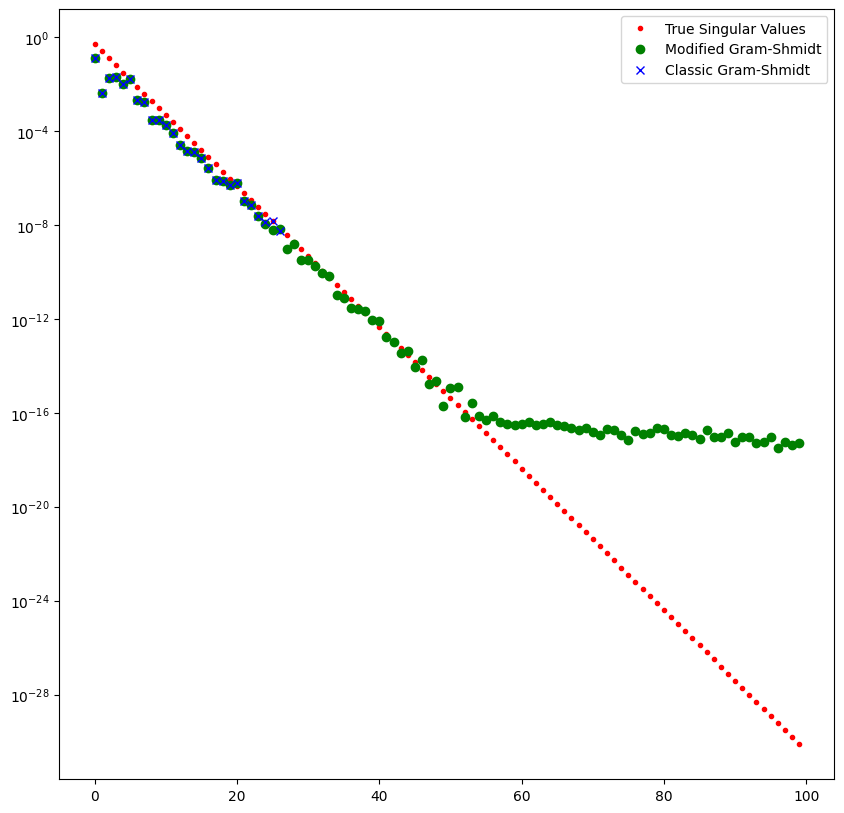

In [25]:
plt.figure(figsize=(10,10))
plt.semilogy(np.diag(S), 'r.', label="True Singular Values")
plt.semilogy(np.diag(RM), 'go', label="Modified Gram-Shmidt")
plt.semilogy(np.diag(RC), 'bx', label="Classic Gram-Shmidt")
plt.legend()
rcParams.update({'font.size': 18})

### Eigenvalue Decomposition using QR Factorization

Use the QR algorithm (or QR method) to get the eigenvalues of matrix $A$. Do 100 iterations, and print out the 1st, 5th, 10th, 20th and 100th iteration.

 **Reminder**: The QR algorithm (or QR method), uses the QR factorization, but don't confuse the two.

In [26]:
def QR_Eigen(A, iterations):
    n = A.shape[0]
    for i in range(iterations):
        Q, R = np.linalg.qr(A)
        A = np.dot(R, Q)
        if i+1 in [1, 5, 10, 20, 100]:
            print(f"Iteration {i+1}:")
            print(np.diag(A))
            print()

In [28]:
A = np.array([1.0, -1.0, 0.0, 0.0, -1.0, 1.0, -1.0, 0.0, 0.0, -1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 3.0]).reshape((4, 4))
print("The matrix: \n", A)

print("\n --- Built-in ---")
print(np.linalg.eig(A)[0])
##Your Code start here
print("\n QR Algorithm:")
QR_Eigen(A,100)
##Your Code ends here

The matrix: 
 [[ 1. -1.  0.  0.]
 [-1.  1. -1.  0.]
 [ 0. -1.  2.  0.]
 [ 0.  0.  0.  3.]]

 --- Built-in ---
[-0.247   1.445   2.8019  3.    ]

 QR Algorithm:
Iteration 1:
[2. 2. 0. 3.]

Iteration 5:
[ 2.7929  1.4541 -0.247   3.    ]

Iteration 10:
[ 2.8019  1.4451 -0.247   3.    ]

Iteration 20:
[ 2.8019  1.445  -0.247   3.    ]

Iteration 100:
[ 2.8019  1.445  -0.247   3.    ]



##  Q2. SVD & Image processing <sub><sup>``(30 pt.)``</sup></sub>

> In this question, we are going to investigate the use of SVD as a tool to obtain the basis of the matrix in digital image processing.
The first issue we will examine is image compression. For this purpose, in general, we can consider the information inside the image as a data matrix, then find a suitable basis for this information matrix and by depicting the primary matrix on the more important basis vectors and keeping the necessary information to show the initial image with less information.
This process results in image compression. It should be noted that for simplicity, the images we are examining in this exercise are in black and white.
>With the help of SVD, we can find a basis for the column space of the image matrix that we want, so that the columns of the image matrix have the highest correlation with the basis vectors.
>On the other hand, if these bases are considered in descending order of the size of the singular values, they will contain the most general information of the columns of the image, so by keeping only r initial columns of the found bases (U) along with the combined vectors (V) and the singular values (Σ) corresponding to them, we can retain the image's overall image with a good approximation.
>From an expert point of view, the reconstruction is actually a lower-order reconstruction of the primary matrix.
In this view, the value of r is the parameter to control the amount of compression we want.

###  part 1

In this part, the compression operation is performed on the input black and white image with the help of SVD analysis. One of the criteria for comparing the initial and final image is the PSNR criterion. Research about this criterion and draw the PSNR diagram in terms of different r. Then compare the results with the diagram by giving some test inputs and plotting the outputs.
One of the inputs you give to the function should be the image pic.jpg.

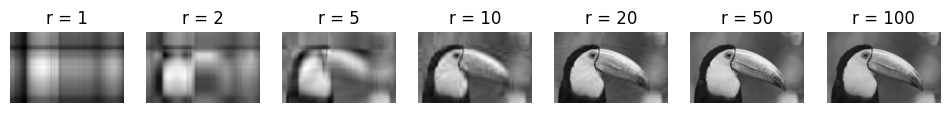

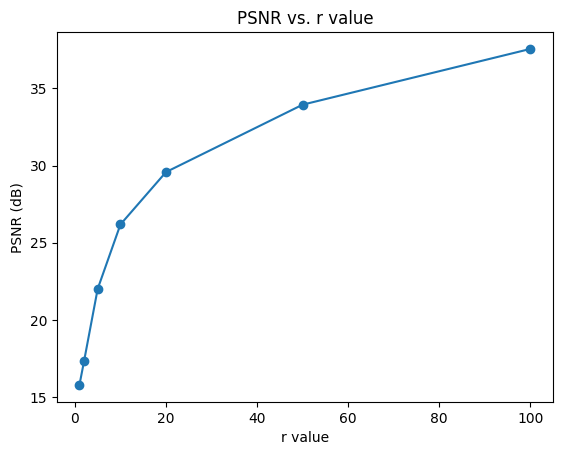

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load the grayscale image
image = cv2.imread('pic.jpg', cv2.IMREAD_GRAYSCALE)
U, S, Vt = np.linalg.svd(image, full_matrices=False)

# Define a function to reconstruct the image using r
def reconstruct_image(U, S, Vt, r):
    reconst_image = np.dot(U[:, :r], np.dot(np.diag(S[:r]), Vt[:r, :]))
    return reconst_image

# Choose different r values for reconstruction
r_values = [1, 2, 5, 10, 20, 50, 100]

# Plot some samples of reconstructed images
plt.figure(figsize=(12, 8))
for i, r in enumerate(r_values):
    reconstructed_image = reconstruct_image(U, S, Vt, r)
    plt.subplot(1, len(r_values), i + 1)
    plt.imshow(reconstructed_image, cmap='gray')
    plt.title(f'r = {r}')
    plt.axis('off')
plt.show()

# Calculate PSNR for each r value
def psnr(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

psnr_values = [psnr(image, reconstruct_image(U, S, Vt, r)) for r in r_values]

# Plot the curve of PSNR vs. r value
plt.figure()
plt.plot(r_values, psnr_values, marker='o')
plt.title('PSNR vs. r value')
plt.xlabel('r value')
plt.ylabel('PSNR (dB)')
plt.show()


###  part 2

Another issue that we can explore with a similar idea of applying base transform is removing noise from images. In the condition that the noise in the image is uniform and in such a way that it does not distort the general information in the image. from the point of view of SVD, according to the examination of the general information, the direction of the image vector on bases with larger singular values has not changed much, and removing the information related to Examining general information to vectors with less importance can remove noise and keep the main information of the image.
In this part, add two different noises salt and pepper and Gaussian noise with a desired and appropriate range to the image pic.jpg so that the PSNR of both images is in the same range, then perform the noise reduction process with the help of SVD analysis.
For both noises, draw the PSNR diagram in terms of different r.
  Then compare the results with the graph by plotting a number of outputs.
  Which of the noises is more effective in this method?


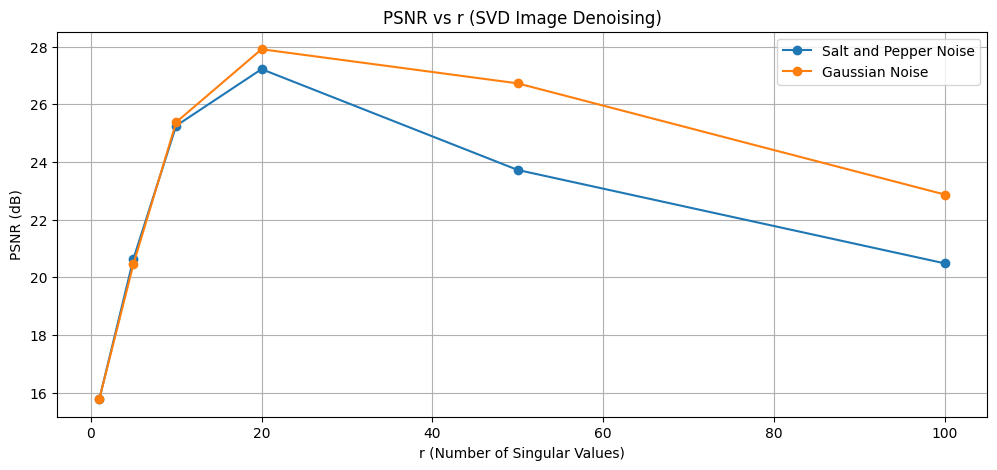

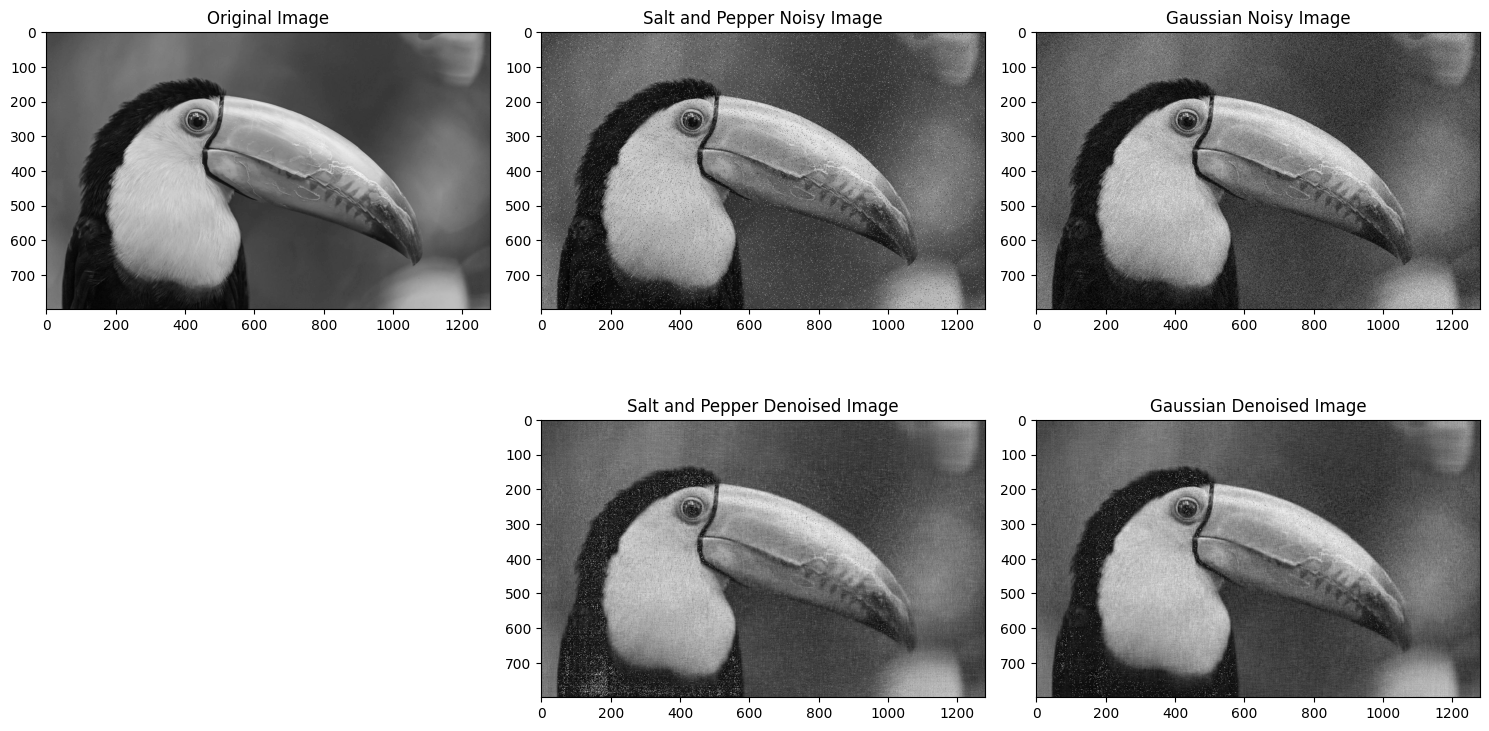

In [29]:
# Load the original image
original_image = cv2.imread('pic.jpg', cv2.IMREAD_GRAYSCALE)

# Add salt and pepper noise
def add_salt_and_pepper_noise(image, salt_prob, pepper_prob):
    noisy_image = np.copy(image)
    total_pixels = noisy_image.size
    # Salt noise
    num_salt = int(salt_prob * total_pixels)
    salt_coords = [np.random.randint(0, i - 1, num_salt) for i in noisy_image.shape]
    noisy_image[salt_coords[0], salt_coords[1]] = 255
    # Pepper noise
    num_pepper = int(pepper_prob * total_pixels)
    pepper_coords = [np.random.randint(0, i - 1, num_pepper) for i in noisy_image.shape]
    noisy_image[pepper_coords[0], pepper_coords[1]] = 0
    return noisy_image.astype(np.uint8)  # Ensure data type is uint8

salt_prob = 0.02
pepper_prob = 0.02
salt_pepper_noisy_image = add_salt_and_pepper_noise(original_image, salt_prob, pepper_prob)

# Add Gaussian noise
def add_gaussian_noise(image, mean, std_dev):
    noisy_image = image + np.random.normal(mean, std_dev, image.shape)
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)  # Ensure data type is uint8
    return noisy_image

gaussian_mean = 0
gaussian_std_dev = 25
gaussian_noisy_image = add_gaussian_noise(original_image, gaussian_mean, gaussian_std_dev)

# Perform SVD-based denoising for salt and pepper noise
def svd_denoising(image, r):
    U, s, Vt = np.linalg.svd(image.astype(np.float32), full_matrices=False)  # Ensure data type is float32
    S = np.diag(s)
    reconstructed_image = np.dot(U[:, :r], np.dot(S[:r, :r], Vt[:r, :]))
    return reconstructed_image.astype(np.uint8)  # Ensure data type is uint8

# Calculate PSNR for different r values
r_values = [1, 5, 10, 20, 50, 100]
psnr_salt_pepper = [cv2.PSNR(original_image, svd_denoising(salt_pepper_noisy_image, r)) for r in r_values]

# Perform SVD-based denoising for Gaussian noise
psnr_gaussian = [cv2.PSNR(original_image, svd_denoising(gaussian_noisy_image, r)) for r in r_values]

# Plot PSNR vs r for both noises
plt.figure(figsize=(12, 5))
plt.plot(r_values, psnr_salt_pepper, marker='o', label='Salt and Pepper Noise')
plt.plot(r_values, psnr_gaussian, marker='o', label='Gaussian Noise')
plt.title('PSNR vs r (SVD Image Denoising)')
plt.xlabel('r (Number of Singular Values)')
plt.ylabel('PSNR (dB)')
plt.legend()
plt.grid(True)
plt.show()

# Plot the images and their denoised versions
reconstructed_image_salt_pepper = svd_denoising(salt_pepper_noisy_image, r_values[-1])
reconstructed_image_gaussian = svd_denoising(gaussian_noisy_image, r_values[-1])

plt.figure(figsize=(15, 8))
plt.subplot(2, 3, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 3, 2)
plt.imshow(salt_pepper_noisy_image, cmap='gray')
plt.title('Salt and Pepper Noisy Image')

plt.subplot(2, 3, 3)
plt.imshow(gaussian_noisy_image, cmap='gray')
plt.title('Gaussian Noisy Image')

plt.subplot(2, 3, 5)
plt.imshow(reconstructed_image_salt_pepper, cmap='gray')
plt.title('Salt and Pepper Denoised Image')

plt.subplot(2, 3, 6)
plt.imshow(reconstructed_image_gaussian, cmap='gray')
plt.title('Gaussian Denoised Image')

plt.tight_layout()
plt.show()


##  Q3. PCA and Clustering <sub><sup>``(40 pt.)``</sup></sub>
In this problem we want to cluster some data points.
But first, you should reduce the number of features by the PCA algorithm then use kmeans clustering algorithm

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

### Import Dataset

In [31]:
Datapoint = pd.read_csv('Datapoint.csv')

### Correlation Heatmap

In this part plot the correlation Heatmap of features.
what is your suggestion about the number of principal components that they have high variance? Explain why.

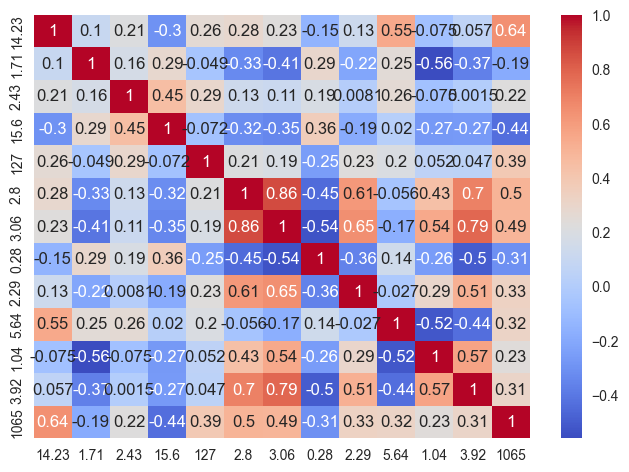

In [32]:
# Plot the heatmap
sns.heatmap(Datapoint.corr(), cmap='coolwarm', annot=True)
plt.show()


As Clearly shown in the above figure, The blocks with the Correlation Coefficient close to -1 show the principal components with high variance

###  Data Preprocessing

In [33]:
Datapoint.head()

,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065
0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


### PCA (Principal Component Analysis)
> As you know for applying PCA we should scale our data points.Here we use MinMax and Standard Scaler.
(First, use Standard Scaler)

Calculate principal components and plot Explained variance by each component.

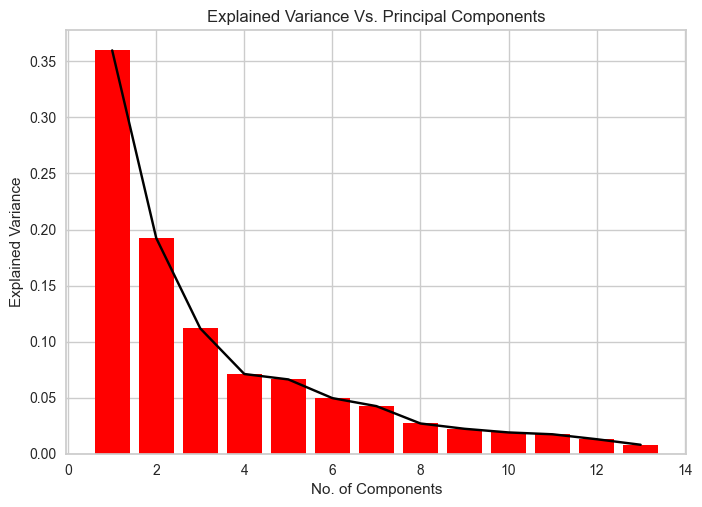

In [34]:
# Define a function for PCA
def PCA_Algorithm(data):
    # Scaling the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)

    # Calculate covariance matrix
    covariance_matrix = np.cov(scaled_data, rowvar=False)

    # Calculate eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

    # Sort eigenvalues and their corresponding eigenvectors
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Calculate explained variance ratio
    ratio = eigenvalues / np.sum(eigenvalues)

    return ratio

# Visualize the results
def plot_EV(ratio):
    plt.bar(range(1, len(ratio) + 1), ratio, color='red')
    plt.plot(range(1, len(ratio) + 1), ratio, color='black')
    plt.title('Explained Variance Vs. Principal Components')
    plt.xlabel('No. of Components')
    plt.ylabel('Explained Variance')
    plt.show()

EV = PCA_Algorithm(Datapoint) # Explained Variance
plot_EV(EV) # Plotting EVs


Apply PCA Algorithm from scratch and reduce the number of features to the number you have guessed in previous parts.

In [35]:
N = 2 # As found in previous sections
# Finding Mean and Standard Deviation
Mean = np.mean(Datapoint, axis=0)
STD = np.std(Datapoint, axis=0)

# Scaling Data
Scaled_Data = (Datapoint - Mean)/STD

# Finding Covariance Matrix
Covariance_Matrix = np.cov(Scaled_Data, rowvar=False)

# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(Covariance_Matrix)

# Sort eigenvalues and their corresponding eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

top_eigenvectors = eigenvectors[:, :N]

PCA_Data = np.dot(Scaled_Data, top_eigenvectors)

### PCA plot in 2D
Plot data points using their two first features.What do you think about the number of clusters?

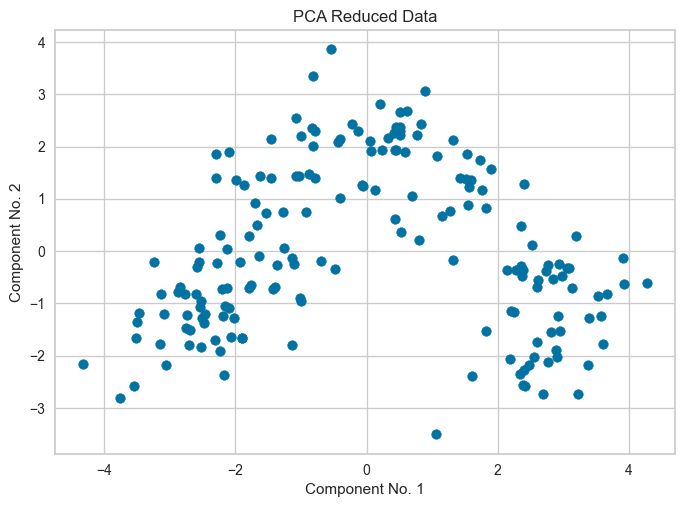

In [36]:
# Plotting Results
plt.scatter(PCA_Data[:, 0], PCA_Data[:, 1])
plt.title('PCA Reduced Data')
plt.xlabel('Component No. 1')
plt.ylabel('Component No. 2')
plt.show()

The Figure above implies that there might be 2 or 3 clusters.
### Do all previous steps for MinMax Scaling
Tell your opinion about diffrences.




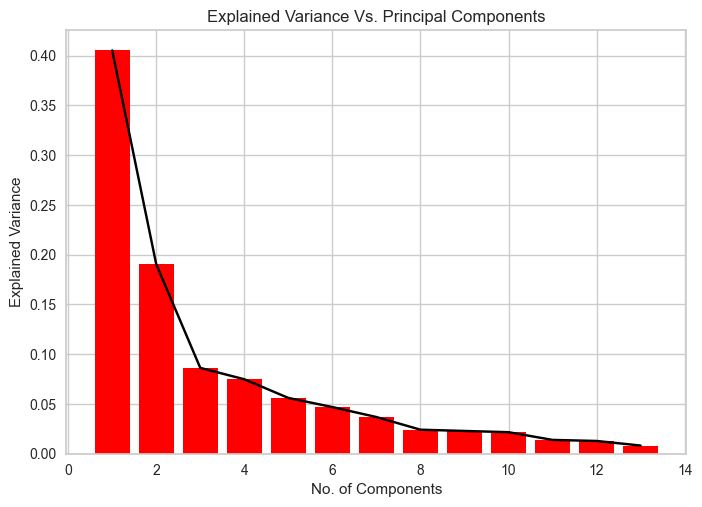

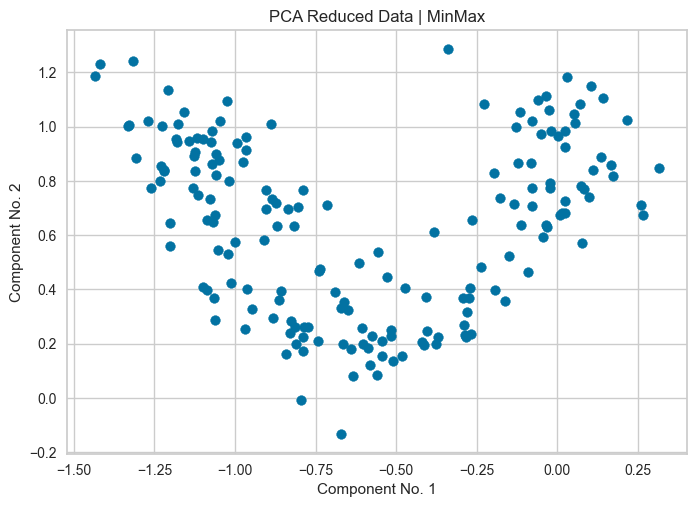

In [37]:
# Similar Process but for MinMax:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(Datapoint)

covariance_matrix = np.cov(scaled_data, rowvar=False)

eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

ratio = eigenvalues / np.sum(eigenvalues)

plt.bar(range(1, len(ratio) + 1), ratio, color='red')
plt.plot(range(1, len(ratio) + 1), ratio, color='black')
plt.title('Explained Variance Vs. Principal Components')
plt.xlabel('No. of Components')
plt.ylabel('Explained Variance')
plt.show()

#------------------------------------------------------------------


N = 11
def PCA_MinMax(data, N):
    # Scaling the data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data)

    # Calculate covariance matrix
    covariance_matrix = np.cov(scaled_data, rowvar=False)

    # Calculate eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

    # Sort eigenvalues and their corresponding eigenvectors
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    top_eigenvectors = eigenvectors[:, :N]

    # Calculating new PCA by MinMax
    Final_Data = np.dot(scaled_data, top_eigenvectors)
    
    return Final_Data

MinMaxData = PCA_MinMax(Datapoint, N)

# Plotting results
plt.scatter(MinMaxData[:, 0], MinMaxData[:, 1])
plt.title('PCA Reduced Data | MinMax')
plt.xlabel('Component No. 1')
plt.ylabel('Component No. 2')
plt.show()


### KMeans Clustering
#### Elbow Method for Determining Cluster Amount on  Dataset

Using the elbow method to find the optimal number of clusters

c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\

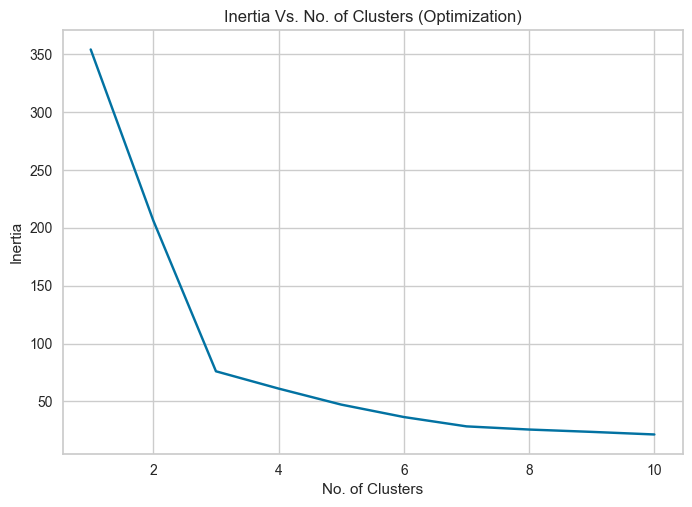

In [38]:
# Similar Approach
scaler = StandardScaler()
scaled_data2 = scaler.fit_transform(PCA_Data)

K = range(1, 11)
Inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(scaled_data2)
    Inertia.append(kmeans.inertia_)

plt.plot(K, Inertia)
plt.title('Inertia Vs. No. of Clusters (Optimization)')
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')
plt.show()

##Your Code ends here

What is inertia and silhouette metrics?
Explain them briefly:
Inertia and silhouette are both metrics used in the field of clustering to evaluate the quality of a clustering algorithm's results.

🔵 **Inertia**: In the context of clustering, inertia refers to the sum of squared distances between each data point and the centroid of its assigned cluster. When using K-means clustering, for example, the goal is to minimize inertia, as this reflects how compact the clusters are. Lower inertia typically indicates better-defined clusters.

🔵 **Silhouette**: The silhouette score is a measure of how similar an object is to its own cluster compared to other clusters. The silhouette score ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. In general, higher silhouette scores indicate better-defined clusters.

These metrics are useful for assessing the quality of clustering results and for comparing different clustering algorithms or parameter choices.




In [39]:
#You should save your final datapoints in pca_std_datapoint variable
inertia = []
pca_std_datapoint = PCA_Data
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter= 500, random_state=17)
    kmeans.fit(pca_std_datapoint)
    inertia.append(kmeans.inertia_)

100%|██████████| 8/8 [00:00<00:00, 20.94it/s]


In [40]:
silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter=500, random_state=17)
    kmeans.fit(pca_std_datapoint)
    silhouette[i] = sil(pca_std_datapoint, kmeans.labels_, metric='euclidean')

100%|██████████| 8/8 [00:00<00:00, 20.15it/s]


Plot the **inertia** and **silhouette ** values

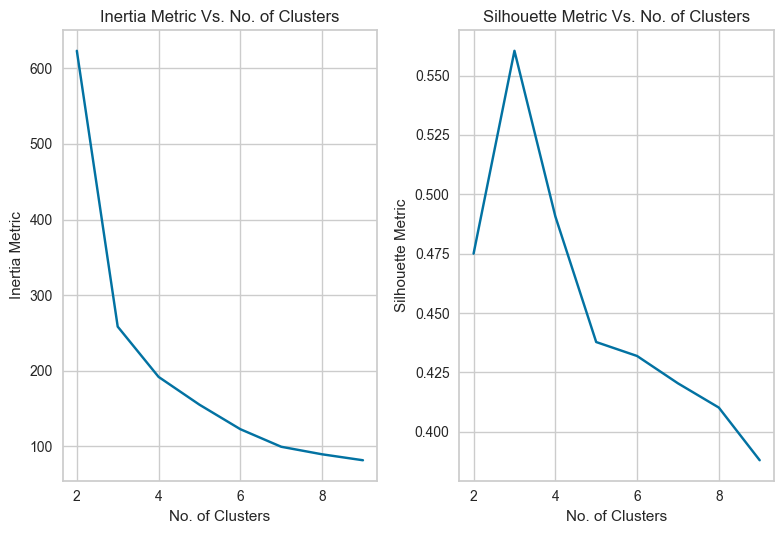

In [41]:
# Plotting Results

plt.subplot(1, 2, 1)
plt.plot(range(2, 10), inertia)
plt.title('Inertia Metric Vs. No. of Clusters')
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia Metric')

plt.subplot(1, 2, 2)
plt.plot(silhouette.keys(), silhouette.values())
plt.title('Silhouette Metric Vs. No. of Clusters')
plt.xlabel('No. of Clusters')
plt.ylabel('Silhouette Metric')

plt.tight_layout()
plt.show()

Tune the hyper parameters based on your conclusions.

In [42]:
model_kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++')
y_predict_kmeans1 = model_kmeans.fit_predict(pca_std_datapoint)


c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


#Now plot the datapoints usig two first features
(Each cluster in a different colour)

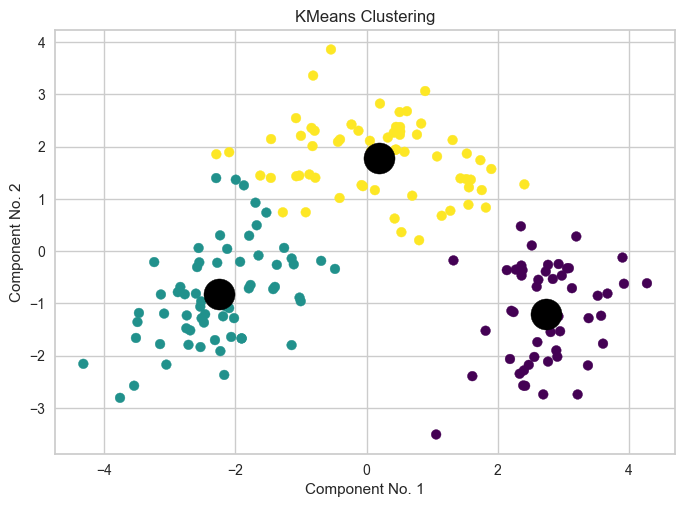

In [43]:
# Plotting Results
plt.scatter(pca_std_datapoint[:, 0], pca_std_datapoint[:, 1], c=y_predict_kmeans1, cmap='viridis')
plt.scatter(model_kmeans.cluster_centers_[:, 0], model_kmeans.cluster_centers_[:, 1], marker='o', s=500, color='black')

plt.title('KMeans Clustering')
plt.xlabel('Component No. 1')
plt.ylabel('Component No. 2')
plt.show()

Do all previous steps for MinMax scaled data points.





In [44]:
pca_std_datapoint = MinMaxData

inertia = []
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter= 500, random_state=10)
    kmeans.fit(pca_std_datapoint)
    inertia.append(kmeans.inertia_)
    
silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter=500, random_state=100)
    kmeans.fit(pca_std_datapoint)
    silhouette[i] = sil(pca_std_datapoint, kmeans.labels_, metric='euclidean')

100%|██████████| 8/8 [00:00<00:00, 20.51it/s]


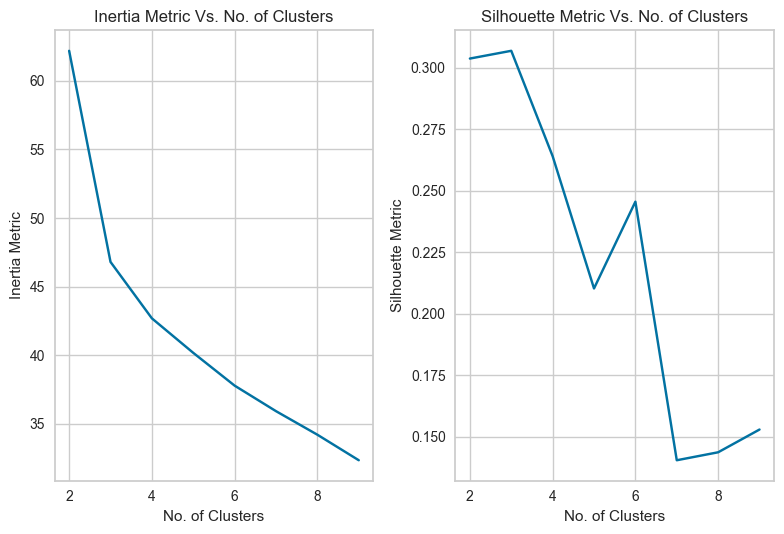

In [45]:
# Plotting Results

plt.subplot(1, 2, 1)
plt.plot(range(2, 10), inertia)
plt.title('Inertia Metric Vs. No. of Clusters')
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia Metric')

plt.subplot(1, 2, 2)
plt.plot(silhouette.keys(), silhouette.values())
plt.title('Silhouette Metric Vs. No. of Clusters')
plt.xlabel('No. of Clusters')
plt.ylabel('Silhouette Metric')

plt.tight_layout()
plt.show()

In [46]:
model_kmeans = KMeans(n_clusters=3, random_state=50, init='k-means++')
y_predict_kmeans1 = model_kmeans.fit_predict(pca_std_datapoint)

c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


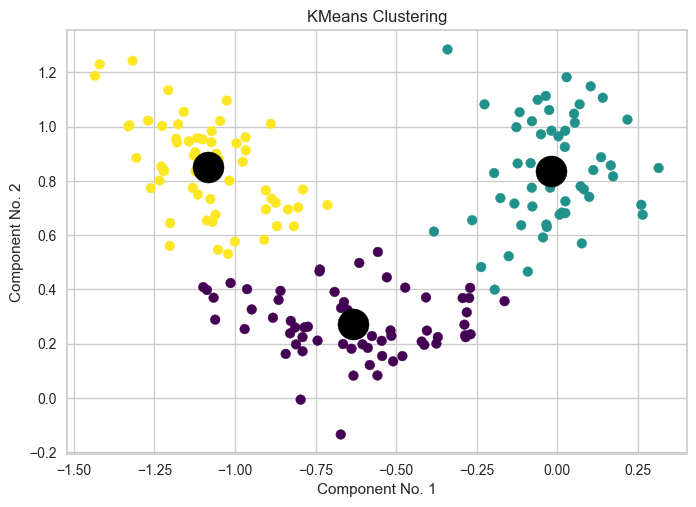

In [47]:
# Plotting Results
plt.scatter(pca_std_datapoint[:, 0], pca_std_datapoint[:, 1], c=y_predict_kmeans1, cmap='viridis')
plt.scatter(model_kmeans.cluster_centers_[:, 0], model_kmeans.cluster_centers_[:, 1], marker='o', s=500, color='black')

plt.title('KMeans Clustering')
plt.xlabel('Component No. 1')
plt.ylabel('Component No. 2')
plt.show()

Compare the results of different scaling methods in a PCA problem

When comparing different scaling methods in Principal Component Analysis (PCA), it's important to consider how each method affects the outcome of the PCA.

1. Standardization (Z-score normalization): This method scales the data so that it has a mean of 0 and a standard deviation of 1. Standardization is useful when the features have different units or scales, as it brings all features to a similar scale. It can help in cases where the features are on different scales, and it emphasizes the shape of the data distribution.

2. Min-Max scaling: This method scales the data to a specific range, often between 0 and 1. Min-Max scaling is useful when the features are bound within a specific range and one wants to preserve the original relationships between the features' values. This method could be helpful when the feature values need to be within a specific range for consistency.

3. Robust scaling: This method scales the data by removing the median and scaling to the IQR (interquartile range). Robust scaling is useful when the data contains outliers, as it is less influenced by them. It helps in cases where the dataset has outliers, and one wants to down-weight their effect. 

The choice of scaling method can affect the outcome of PCA. Standardization is a commonly used first step in PCA, as it can help to compare variables that use different units. Min-Max scaling preserves the relationships between the original values, but it may not handle outliers well. Robust scaling is robust against outliers, but it may not be as sensitive to the underlying structure of the data.

The choice of which method to use ultimately depends on the characteristics of the dataset and the goals of the analysis! 📊